## **Dataset Description**

The dataset contains reviews of fine foods from Amazon. It is a collection of over **500,000** reviews from **1999** to **2012**. These reviews include text, star ratings, helpfulness votes, and timestamps.

Dataset Link : https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

The dataset consists of the following columns:

**1) Id:** A unique identifier for each review.

**2) ProductId:** An identifier for the product being reviewed.

**3) UserId:** An identifier for the user who wrote the review.

**4) ProfileName:** The name of the user as it appears on their profile.

**5) HelpfulnessNumerator:** The number of users who found the review helpful.

**6) HelpfulnessDenominator:** The number of users who rated whether the review
was helpful.

**7) Score:** The overall rating given to the product (1 to 5 stars).

**8) Time:** The timestamp for when the review was written, represented as a Unix epoch timestamp.

**9) Summary:** A short summary or title for the review.

**10) Text:** The main body of the review text.

## **Data Cleaning and Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
df = pd.read_csv('/content/Amazon Fine Food Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.info()  # Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


**Observation :** 'Time' column should be date type

In [ ]:
# Converting 'Time' column into date type
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time'].head(5)

,Time
0,2011-04-27
1,2012-09-07
2,2008-08-18
3,2011-06-13
4,2012-10-21


In [ ]:
df.info() # Again checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568428 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  datetime64[ns]
 8   Summary                 568427 non-null  object        
 9   Text                    568454 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isnull().sum()   # Counting null values in each column

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


**Note :** Even tough there are null values in Summary and ProfileName column, we are not dropping them because the former column will create redundancy as we already have Text column that contains reviews. ProfileName is also not a useful column for model. Since we are not passing these columns into model, we can drop them in the later stage

In [ ]:
df.duplicated().sum()  # Checking for duplicate records

0

In [ ]:
df.describe()  # Displaying the descriptive statistics

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,568454
mean,284227.500000,1.743817,2.22881,4.183199,2011-01-28 23:16:44.902419712
min,1.000000,0.000000,0.00000,1.000000,1999-10-08 00:00:00
25%,142114.250000,0.000000,0.00000,4.000000,2010-04-15 00:00:00
50%,284227.500000,0.000000,1.00000,5.000000,2011-07-20 00:00:00
75%,426340.750000,2.000000,2.00000,5.000000,2012-03-26 00:00:00
max,568454.000000,866.000000,923.00000,5.000000,2012-10-26 00:00:00
std,164098.679298,7.636513,8.28974,1.310436,NaN


**Observation :** HelpfulnessNumerator and HelpfulnessDenominator columns might have outliers.

In [ ]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, upper_bound, lower_bound

# Identify outliers in HelpfulnessNumerator
outliers_numerator, upper_numerator, lower_numerator = identify_outliers(df, 'HelpfulnessNumerator')
print(f"\nTotal number of outliers: {len(outliers_numerator)} rows")


Total number of outliers: 37002 rows


In [ ]:
# Identify outliers in HelpfulnessDenominator
outliers_denominator, upper_denominator, lower_denominator = identify_outliers(df, 'HelpfulnessDenominator')
print(f"\nTotal number of outliers: {len(outliers_denominator)} rows")


Total number of outliers: 52643 rows


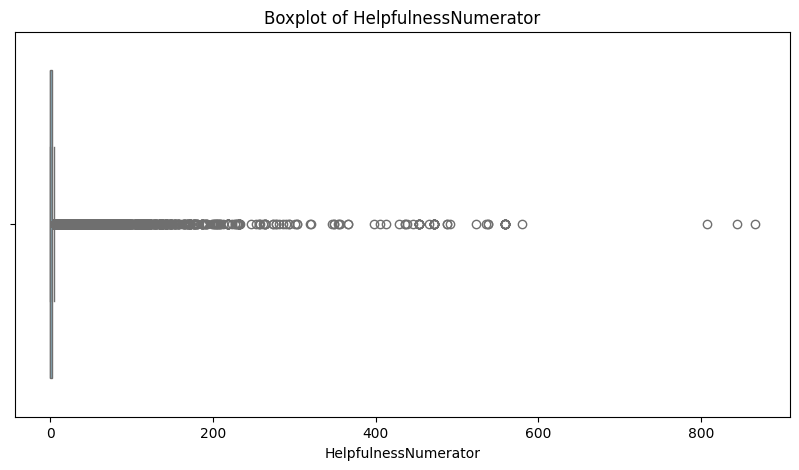

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['HelpfulnessNumerator'], color='skyblue')
plt.title('Boxplot of HelpfulnessNumerator')
plt.xlabel('HelpfulnessNumerator')
plt.show()

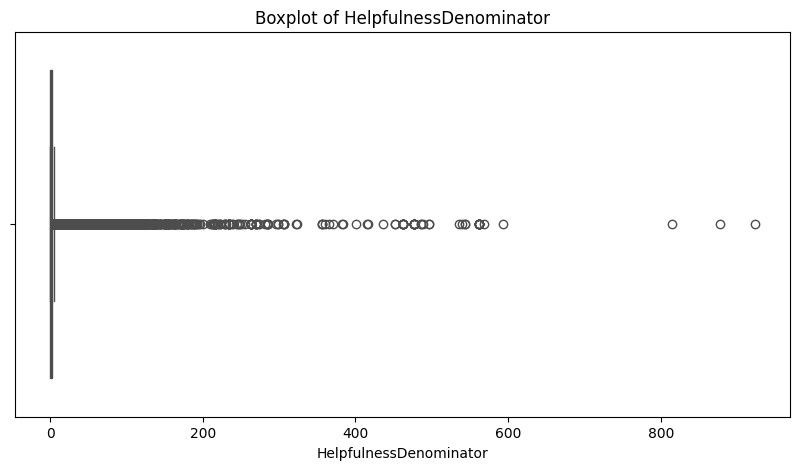

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['HelpfulnessDenominator'], color='orange')
plt.title('Boxplot of HelpfulnessDenominator')
plt.xlabel('HelpfulnessDenominator')
plt.show()

**Observation :** Both the boxplots shows that there are some outliers in the respective columns. We can cap (using Winsorization technique) them since dropping these columns can lead to data loss

In [ ]:
# Apply Winsorization by capping the values at the upper bound
df['HelpfulnessNumerator'] = df['HelpfulnessNumerator'].clip(upper=upper_numerator)
df['HelpfulnessDenominator'] = df['HelpfulnessDenominator'].clip(upper=upper_denominator)

**Note :** Since we don't have Sentiment column in our dataset, we can use Score column to create this feature.

In [ ]:
# Map Score to Sentiment
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x >= 4 else ('Neutral' if x == 3 else 'Negative'))

**Note :** Reason for not choosing any technqiues like VADER for sentiment classification is because Score column in the dataset already provides a numeric rating (ranging from 1 to 5).

<ipython-input-95-985bc5450b7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sentiment', palette='Set2')


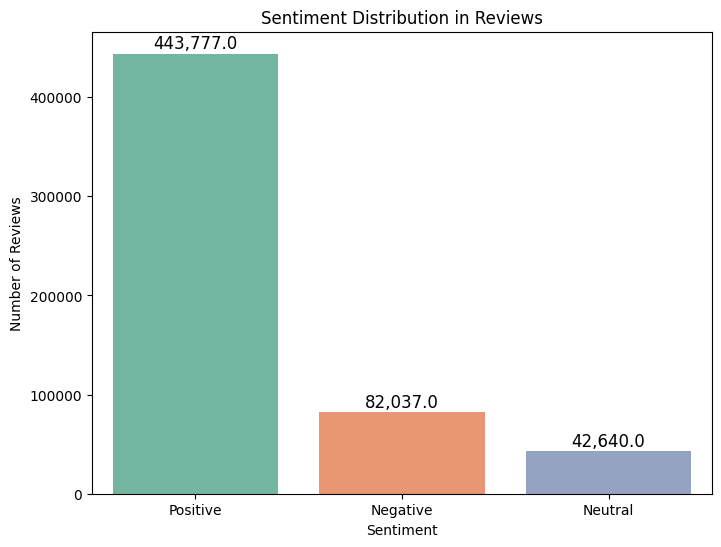

In [ ]:
# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sentiment', palette='Set2')

# Add the exact number on top of the bars
for p in ax.patches:
    # Get the height of each bar (the count)
    height = p.get_height()

    # Add the number on top of the bar
    ax.text(p.get_x() + p.get_width() / 2, height + 1000,  # Position the text
            f'{height:,}',  # Format the number with commas
            ha='center',    # Center-align the text
            va='bottom',    # Position the text above the bar
            fontsize=12)    # Set the font size

# Add title and labels
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

**Observation :** Classes are highly imbalanced so we can either do downsampling majority class (can lead to data loss) or upsampling minority class (can lead to overfitting due to repeated/synthetic data). Since both these methods have downside, we can use class_weight parameter in the model building stage so that model will not have any biasness.

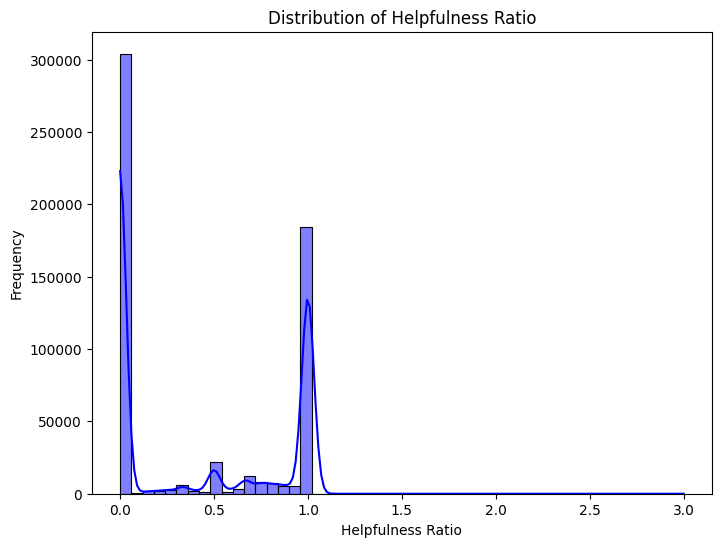

In [ ]:
# Compute helpfulness ratio
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1e-5)  # Avoid division by zero

# Plot distribution of Helpfulness Ratio
plt.figure(figsize=(8, 6))
sns.histplot(df['HelpfulnessRatio'], bins=50, kde=True, color='blue')
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Frequency')
plt.show()

In the context of the "Helpfulness Ratio":

0: Indicates reviews that were not found helpful by any users.

1: Indicates reviews that were found entirely helpful by users.

1. **Prominent Peaks**: There are two significant peaks in the Helpfulness Ratio: one at 0 and another at 1.
   - **Peak at 0**: Indicates a large number of reviews were not found helpful at all by users, suggesting potential issues with review quality or relevance.
   - **Peak at 1**: Indicates many reviews were found extremely helpful, showing that users provided valuable feedback.

2. **Variation Between 0 and 1**: There are fewer reviews with a Helpfulness Ratio between 0 and 1, indicating a polarized trend where reviews are often either very helpful or not helpful at all.

3. **Sparse Beyond 1**: Very few occurrences of Helpfulness Ratio beyond 1, aligning with the expectation since the ratio is generally constrained between 0 and 1.


<ipython-input-97-c3d40edbbec9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='HelpfulnessNumerator', palette='Set2')


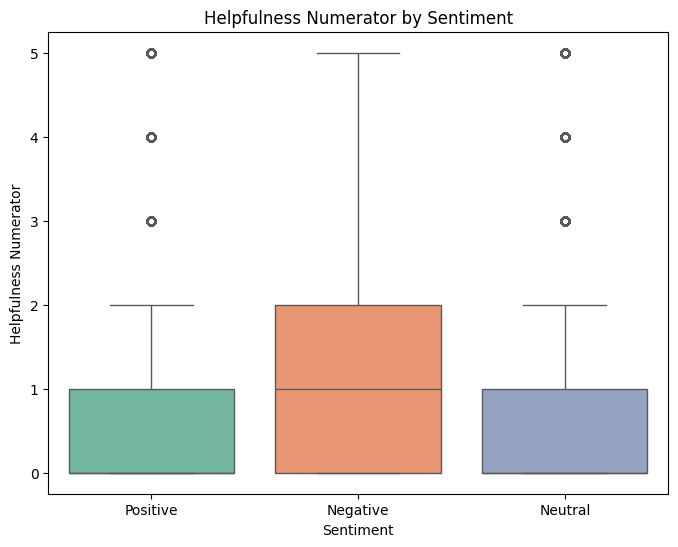

In [ ]:
# Plot boxplot of Helpfulness Numerator vs Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sentiment', y='HelpfulnessNumerator', palette='Set2')
plt.title('Helpfulness Numerator by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Helpfulness Numerator')
plt.show()

1) **Positive Sentiment**: Median helpfulness around 1, with most reviews rated between 0.5 and 2; outliers extend up to 5.

2) **Negative Sentiment**: Wider range with median around 1, reviews mostly between 0.5 and 2; several high outliers, indicating that negative reviews are often found highly helpful.

3) **Neutral Sentiment**: Median helpfulness around 0.5, with most reviews between 0 and 1; fewer high outliers than Positive sentiment.

These insights suggest that negative reviews tend to be rated as more helpful compared to positive and neutral reviews.


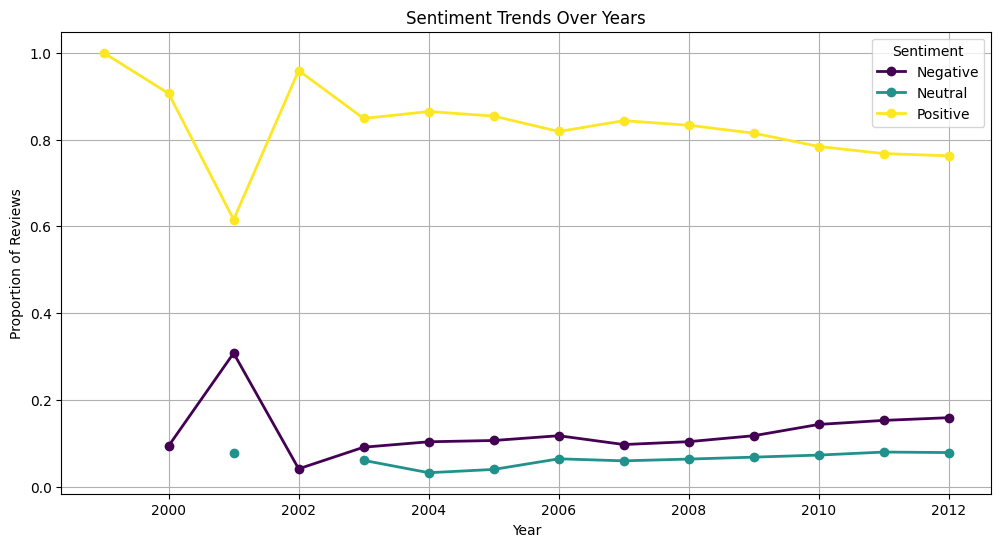

In [ ]:
# Group by year and sentiment
sentiment_distribution = df.groupby([df['Time'].dt.year, 'Sentiment']).size().unstack()

# Normalize for proportions
sentiment_distribution = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0)

# Plot line chart for each sentiment
sentiment_distribution.plot(kind='line', figsize=(12, 6), linewidth=2, marker='o', cmap='viridis')
plt.title('Sentiment Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


1. **Positive Sentiment**:
   - **Initial Dominance**: High proportion of positive reviews, with fluctuations, starting at 1.0 in 1999 and ending around 0.7 in 2012.
   - **Trend**: General decline after peaking around 2003.
2. **Negative Sentiment**:
   - **Increasing Trend**: Initially low, peaks around 0.2 in 2002, then stabilizes with a slight increase, ending around 0.1 in 2012.
3. **Neutral Sentiment**:
   - **Stability**: Remains low and stable with minor fluctuations, starting very low in 1999 and ending around 0.1 in 2012.

These trends highlight changes in customer sentiment over time, indicating a shift towards more varied reviews.


## **Feature Selection**

**Note :** Retaining only Text, Score and Sentiment column. Text and Sentiment column will act as input and output features and Score column will help model to make correct prediction. We can just drop the rest of the columns.

In [ ]:
df.drop(columns=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'HelpfulnessRatio'], inplace=True)

In [ ]:
df.head(5)  # Checking the new dataframe

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,Positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,4,This is a confection that has been around a fe...,Positive
3,2,If you are looking for the secret ingredient i...,Negative
4,5,Great taffy at a great price. There was a wid...,Positive


## **Text Preprocessing**

In [ ]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)

    # Remove non-alphabetic characters and digits (retain spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

**Note :** Converting all the text into lowercase, and removing html tags or any unnecessary characters or digits.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove extra spaces
    text = ' '.join(tokens)  # Rejoin tokens into a string
    text = ' '.join(text.split())  # Remove extra spaces between words

    return text

df['Preprocessed_Text'] = df['Cleaned_Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Note :** Tokenizing the text, removing stopwords and lemmatizing it.

In [ ]:
df.head(5)

,Score,Text,Sentiment,Cleaned_Text,Preprocessed_Text
0,5,I have bought several of the Vitality canned d...,Positive,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,1,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...
2,4,This is a confection that has been around a fe...,Positive,this is a confection that has been around a fe...,confection around century light pillowy citrus...
3,2,If you are looking for the secret ingredient i...,Negative,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,Great taffy at a great price. There was a wid...,Positive,great taffy at a great price there was a wide...,great taffy great price wide assortment yummy ...


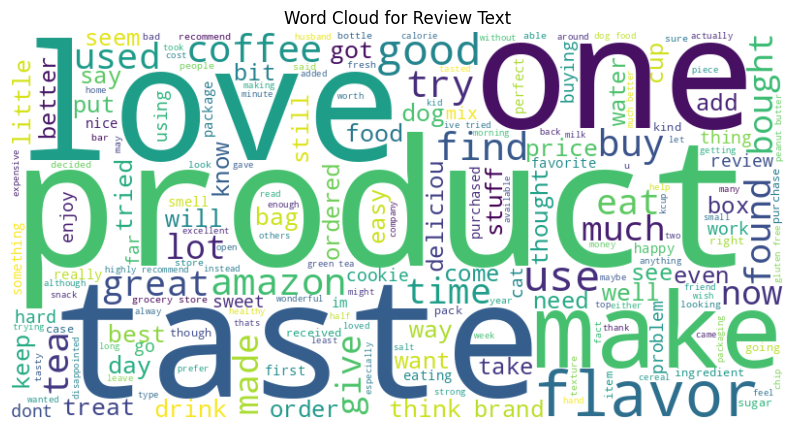

In [ ]:
from wordcloud import WordCloud

# Combine all the review texts into one large string
all_reviews = ' '.join(df['Cleaned_Text'].dropna())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()

- **Prominent Words**: Words like "one," "product," "taste," "love," "make," "great," "coffee," "good," and "used" are prominently displayed.
- **Themes**: Indicates common themes and sentiments, with positive words like "love," "great," and "good" suggesting general satisfaction with products.
- **Product Focus**: Frequent mentions of words like "product," "taste," and "coffee" highlight key aspects of the reviews.

These insights help understand the main themes and sentiments expressed by customers.


## **Feature Extraction**

**Note :** Using TF-IDF instead of Bag of Words is generally a better choice because it prioritizes important words, handles rare words more appropriately, and helps build a more efficient and effective model for sentiment analysis .

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract the preprocessed text data as input features
X = df['Preprocessed_Text']

# Initialize a LabelEncoder to convert categorical sentiment labels to numeric values
label_encoder = LabelEncoder()

# Transform the 'Sentiment' column into numerical labels (e.g., positive -> 1, negative -> 0, etc.)
y = label_encoder.fit_transform(df['Sentiment'])

# Display the sentiment classes and their corresponding numerical values
print(f"Sentiment classes: {label_encoder.classes_}")

# Split the dataset into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing datasets for verification
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")

Sentiment classes: ['Negative' 'Neutral' 'Positive']
Shape of training data (X_train): (454763,)
Shape of testing data (X_test): (113691,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer with a maximum of 5000 features and support for unigrams and bigrams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Learn the vocabulary and transform the training data into a TF-IDF feature matrix
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data into a TF-IDF feature matrix using the vocabulary learned from the training data
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the transformed training and testing datasets for verification
print(f"Shape of training data after TF-IDF (X_train_tfidf): {X_train_tfidf.shape}")
print(f"Shape of testing data after TF-IDF (X_test_tfidf): {X_test_tfidf.shape}")

Shape of training data after TF-IDF (X_train_tfidf): (454763, 5000)
Shape of testing data after TF-IDF (X_test_tfidf): (113691, 5000)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler to normalize the TF-IDF features
# Note: with_mean=False is required because TF-IDF matrices are sparse and centering (subtracting mean) is not supported
scaler = StandardScaler(with_mean=False)

# Fit the scaler to the training data and transform it to normalize the TF-IDF features
X_train_scaled = scaler.fit_transform(X_train_tfidf)

# Transform the testing data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_tfidf)

## **Model Building**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates a classification model using metrics and visualizations.

    Parameters:
    - model: The classification model to be trained and evaluated (e.g., Logistic Regression, Naive Bayes).
    - X_train: Features for training the model.
    - X_test: Features for testing the model.
    - y_train: True labels for training data.
    - y_test: True labels for testing data.

    Functionality:
    - Trains the model on the training data.
    - Predicts the labels for the testing data.
    - Computes and displays the classification report (Precision, Recall, F1-Score).
    - Computes and displays overall Precision, Recall, and F1 Score (weighted).
    - Generates and visualizes the confusion matrix using a heatmap.
    """
    # Train the classification model on the training dataset
    model.fit(X_train, y_train)

    # Predict labels for the testing dataset
    y_pred = model.predict(X_test)

    # Display the classification report including Precision, Recall, and F1-Score for each class
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate overall Precision, Recall, and F1 Score (weighted averages)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the calculated evaluation metrics
    print(f"\nPrecision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}\n")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")

    # Visualize the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['Negative', 'Neutral', 'Positive'],
        yticklabels=['Negative', 'Neutral', 'Positive']
    )
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

**Note :** Since there is no class_weight parameter in Naive Bayes (because its a probabilistic model), we need to calculate class_prior. class_prior helps to define the prior probabilities of each class before any features are considered.

In [ ]:
import numpy as np

# Calculate the class priors for the training dataset
class_counts = np.bincount(y_train)  # Count occurrences of each class in the training labels
class_priors = class_counts / len(y_train)  # Compute class proportions (prior probabilities)

# Display the calculated class priors
print(class_priors)

[0.14481389 0.07510505 0.78008105]


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60     16181
           1       0.22      0.59      0.31      8485
           2       0.96      0.76      0.84     89025

    accuracy                           0.73    113691
   macro avg       0.57      0.67      0.59    113691
weighted avg       0.84      0.73      0.77    113691


Precision (Weighted): 0.8422
Recall (Weighted): 0.7316
F1 Score (Weighted): 0.7701

Confusion Matrix:
[[10901  3796  1484]
 [ 1978  4979  1528]
 [ 7357 14373 67295]]



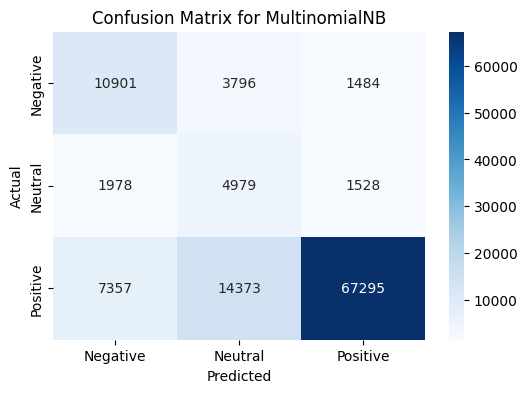

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Initialize a Multinomial Naive Bayes model with class priors calculated from the training data
nb_model = MultinomialNB(class_prior=class_priors)

# Evaluate the Naive Bayes model on the scaled training and testing data
evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test)

## **Insights**

- Naive Bayes performs relatively well on the positive class (class 2), achieving a high recall of 0.96.
- However, it struggles with class 1 (neutral sentiment), where recall is low (0.59), which affects the overall performance.
- Precision is strong for class 2 (0.96), but the recall for negative and neutral classes is lower, resulting in an average performance for those classes.


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68     16181
           1       0.27      0.64      0.38      8485
           2       0.97      0.81      0.88     89025

    accuracy                           0.79    113691
   macro avg       0.62      0.73      0.65    113691
weighted avg       0.87      0.79      0.82    113691


Precision (Weighted): 0.8684
Recall (Weighted): 0.7878
F1 Score (Weighted): 0.8163

Confusion Matrix:
[[11918  3205  1058]
 [ 1757  5458  1270]
 [ 5233 11601 72191]]



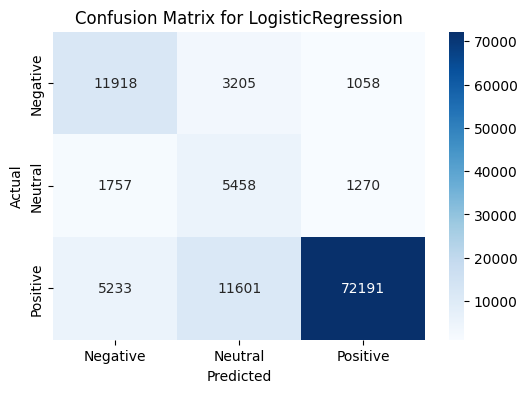

In [ ]:
# Initialize a Logistic Regression model with balanced class weights
# 'class_weight=balanced' automatically adjusts weights inversely proportional to class frequencies
lr_model = LogisticRegression(class_weight='balanced')

# Evaluate the Logistic Regression model on the scaled training and testing data
evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

## **Insights**

- Logistic Regression performs well, especially for class 2 (positive sentiment), with precision of 0.97 and recall of 0.81.
- It performs moderately for class 1 (neutral sentiment) with a recall of 0.64, which is acceptable but not optimal.
- The recall for negative class (class 0) is strong at 0.74, and the overall F1 score of 0.8163 indicates balanced performance across classes.


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.66      0.59     16181
           1       0.24      0.56      0.33      8485
           2       0.93      0.77      0.84     89025

    accuracy                           0.74    113691
   macro avg       0.57      0.66      0.59    113691
weighted avg       0.82      0.74      0.77    113691


Precision (Weighted): 0.8226
Recall (Weighted): 0.7375
F1 Score (Weighted): 0.7679

Confusion Matrix:
[[10726  2521  2934]
 [ 1588  4783  2114]
 [ 7863 12826 68336]]



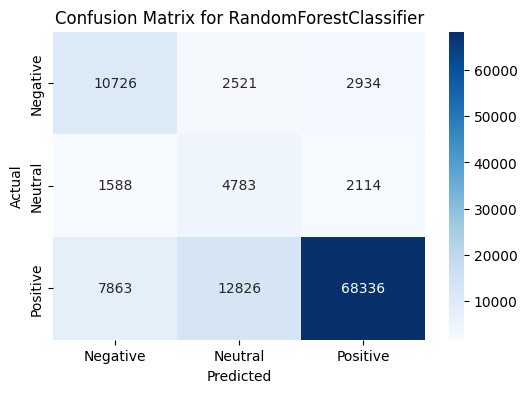

In [ ]:
# Initialize a Random Forest model with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of decision trees in the forest (balanced between performance and speed)
    max_features='sqrt',     # Use the square root of the total features at each split to reduce overfitting
    max_depth=15,            # Restrict the maximum depth of the trees to control model complexity
    class_weight='balanced', # Adjust weights inversely proportional to class frequencies to handle imbalance
    n_jobs=-1,               # Parallelize computations to utilize all CPU cores
    random_state=42          # Set a random state for reproducibility
)

# Evaluate the Random Forest model on the TF-IDF feature matrices
evaluate_model(rf_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

## **Insights**

- Random Forest gives good results with balanced precision and recall, but its performance for class 2 (positive sentiment) is not as strong as Logistic Regression and SVM.
- Recall for class 1 (neutral sentiment) is moderate at 0.56, indicating some difficulty in distinguishing neutral sentiments.
- It provides a reasonable overall F1 score (0.7679), but the model still lags behind Logistic Regression and SVM in terms of precision and recall.

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.71     16181
           1       0.38      0.43      0.40      8485
           2       0.94      0.91      0.93     89025

    accuracy                           0.85    113691
   macro avg       0.67      0.70      0.68    113691
weighted avg       0.86      0.85      0.86    113691


Precision (Weighted): 0.8623
Recall (Weighted): 0.8529
F1 Score (Weighted): 0.8571

Confusion Matrix:
[[12048  1884  2249]
 [ 2105  3653  2727]
 [ 3699  4058 81268]]



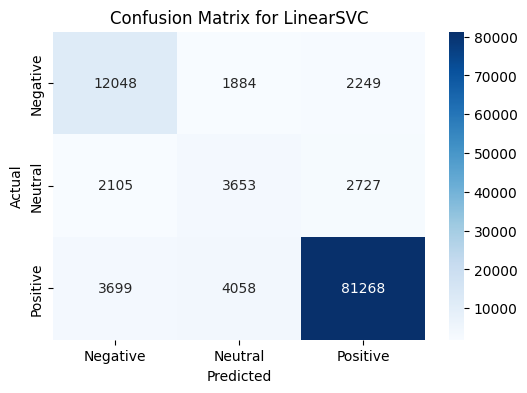

In [ ]:
# Initialize a Linear Support Vector Classifier with balanced class weights
svc_model = LinearSVC(
    class_weight='balanced',  # Automatically adjust weights to handle class imbalance
    max_iter=1000             # Set the maximum number of iterations for convergence
)

# Evaluate the LinearSVC model on the scaled training and testing data
evaluate_model(svc_model, X_train_scaled, X_test_scaled, y_train, y_test)

## **Insights**

- SVM shows the best performance overall, especially for class 2 (positive sentiment), achieving a high precision (0.94) and recall (0.91).
- The recall for class 1 (neutral sentiment) is lower (0.43), but overall, the model performs significantly better than others in terms of precision and recall for the majority class (positive sentiment).
- The weighted F1 score of 0.8571 and an accuracy of 85% make it the top performer.


## **Model Comparison**

- **SVM** emerges as the best model overall due to its superior accuracy, F1 score, and recall for the positive class, making it well-suited for tasks where precision and recall for the dominant class are critical. Its strong overall performance across all sentiment classes ensures it outperforms the other models, particularly in terms of detecting and classifying positive reviews.
  
- **Logistic Regression** comes close to SVM, offering **slightly lower accuracy** but still maintaining a **good balance** between performance and computational efficiency. It is particularly beneficial for applications where **model interpretability** and **faster training/prediction times** are important.

## **Saving the model**

Since SVM and Logistic Regression outperformed all other models, we are saving both of these so that we can integrate them in the UserInterface.

By offering both models, users can choose based on their preference for either speed (Logistic Regression) or accuracy (SVM), allowing for a more personalized experience based on the task at hand.

In [ ]:
import joblib

# Save the trained LinearSVC model to a file for later use
joblib.dump(svc_model, 'svm_model.pkl')

# Save the trained Logistic Regression model to a file for later use
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

In [ ]:
# Save the trained LabelEncoder to a file for later use in encoding labels
joblib.dump(label_encoder, 'label_encoder.pkl')

# Save the trained TF-IDF Vectorizer to a file for later use in transforming text data
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the trained StandardScaler to a file for later use in scaling feature values
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']